In [ ]:
import matplotlib.pyplot as plt
import numpy as np

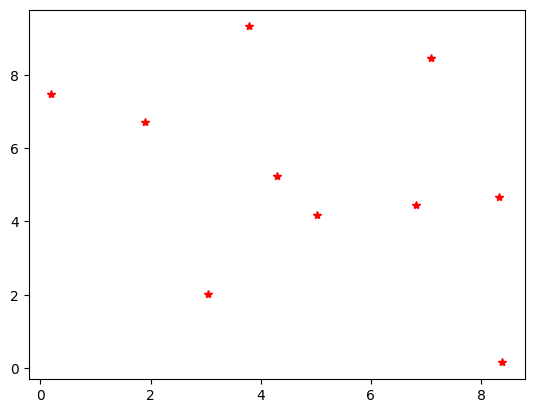

In [ ]:
# Ouvrir le fichier en mode lecture
with open('/content/sample_data/voronoi2D.txt', 'r') as file:
    lines = file.readlines()

# Initialiser une liste pour stocker les coordonnées (x, y)
vert2 = []

# Lire les données depuis le fichier
for line in lines:
    x, y = map(float, line.split())
    vert2.append([x, y])

# Convertir la liste en un tableau NumPy pour un accès plus facile
vert2 = np.array(vert2)

# Tracer les données 2D
plt.figure()
plt.plot(vert2[:, 0], vert2[:, 1], 'r*')

# Afficher le graphique
plt.show()


In [ ]:
print(vert2)

[[8.381184 0.152739]
 [0.196395 7.467857]
 [6.812772 4.450964]
 [3.79481  9.318146]
 [8.31796  4.659943]
 [5.028129 4.186495]
 [7.094714 8.462214]
 [4.288924 5.251525]
 [3.046174 2.026474]
 [1.896537 6.721375]]


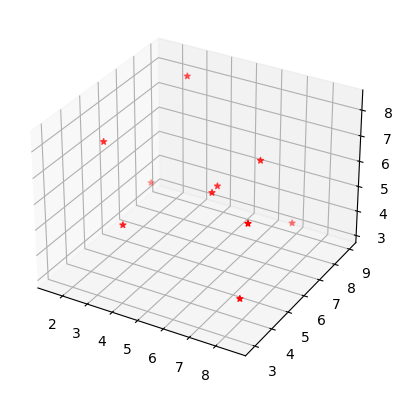

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ouvrir le fichier en mode lecture
with open('/content/sample_data/voronoi3D.txt', 'r') as file:
    lines = file.readlines()

# Initialiser une liste pour stocker les coordonnées (x, y, z)
vert3 = []

# Lire les données depuis le fichier
for line in lines:
    x, y, z = map(float, line.split())
    vert3.append([x, y, z])

# Convertir la liste en un tableau NumPy pour un accès plus facile
vert3 = np.array(vert3)

# Tracer les données 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vert3[:, 0], vert3[:, 1], vert3[:, 2], c='r', marker='*')

# Afficher le graphique
plt.show()


In [ ]:
print(vert3)

[[1.934312 4.965524 7.271132]
 [6.822232 8.997692 3.092902]
 [3.027644 8.216292 8.38496 ]
 [5.416739 6.449104 5.680725]
 [1.50873  8.179743 3.704136]
 [6.978985 6.602276 7.027399]
 [3.78373  3.419706 5.465712]
 [8.600116 2.897259 4.448802]
 [8.536551 3.411936 6.945672]
 [5.935629 5.34079  6.213101]]


#Region de Voronoi 2D

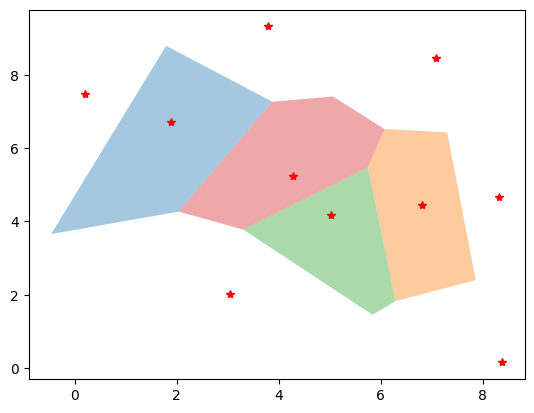

In [ ]:
from scipy.spatial import Voronoi

# Convertir vert2 en un tableau NumPy
vert2 = np.array(vert2)

# Calculer le diagramme de Voronoi
vor2 = Voronoi(vert2)

# Tracer le diagramme de Voronoi
plt.figure()
plt.plot(vert2[:, 0], vert2[:, 1], 'r*')  # Points d'origine en rouge

# Tracer les régions Voronoi
for region in vor2.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.4)

# Afficher le graphique
plt.show()

#triangularisation de delaunay 2D

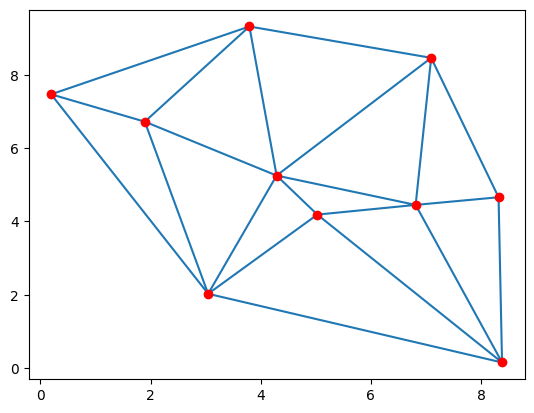

In [ ]:
from scipy.spatial import Delaunay
# Convertir vert2 en un tableau NumPy
vert2 = np.array(vert2)

# Calculer la triangulation de Delaunay
tri2= Delaunay(vert2)

# Tracer les triangles de la triangulation de Delaunay
plt.figure()
plt.plot(vert2[:, 0], vert2[:, 1], 'r*')  # Points d'origine en rouge

# Tracer les triangles
plt.triplot(vert2[:, 0], vert2[:, 1], tri2.simplices)
plt.plot(vert2[:, 0], vert2[:, 1], 'ro')

# Afficher le graphique
plt.show()

In [ ]:
tri2.simplices

array([[5, 8, 0],
       [9, 3, 1],
       [8, 9, 1],
       [9, 7, 3],
       [7, 6, 3],
       [7, 8, 5],
       [7, 9, 8],
       [2, 5, 0],
       [4, 2, 0],
       [2, 7, 5],
       [7, 2, 6],
       [2, 4, 6]], dtype=int32)

#triangularisation de delaunay 3D

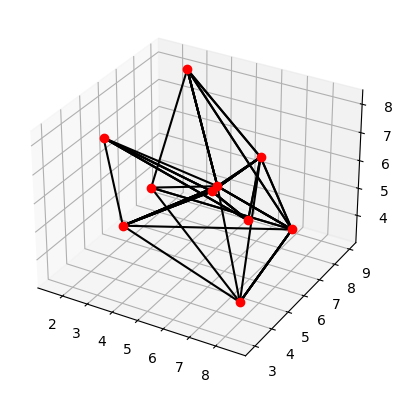

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Convertir vert3 en un tableau NumPy
vert3 = np.array(vert3)

# Calculer la triangulation de Delaunay en 3D
tri3 = Delaunay(vert3)

# Afficher la triangulation de Delaunay en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les tétraèdres de la triangulation
for simplex in tri3.simplices:
    ax.plot(vert3[simplex, 0], vert3[simplex, 1], vert3[simplex, 2], 'k-')


# Tracer les points d'origine
ax.plot(vert3[:, 0], vert3[:, 1], vert3[:, 2], 'ro')

# Afficher le graphique 3D
plt.show()


In [ ]:
vor3 = Voronoi(vert3)
regions3 = vor3.regions
print(regions3)
#remarque seul les regions 3 et 7 qui sont des régions finies et qu'on peut les dessiner

[[-1, 0, 1, 2, 3, 4, 5, 6, 7, 10], [-1, 1, 3, 5, 6, 8, 10, 11, 12], [-1, 13, 14, 15, 16, 17, 18, 19, 20], [5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18], [-1, 4, 6, 7, 9, 10, 12, 13, 14, 15], [-1, 0, 4, 9, 13, 14, 17, 19], [-1, 10, 11, 12, 14, 15, 16], [-1, 1, 2, 3, 8, 11, 16, 18, 20], [0, 2, 3, 4, 5, 7, 8, 9, 17, 18, 19, 20], [], [-1, 0, 1, 2, 19, 20]]


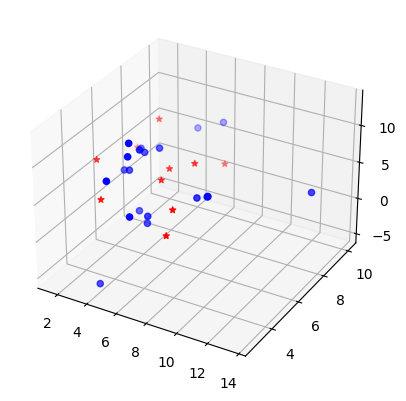

In [ ]:
# Tracer les données 3D
vertices3=vor3.vertices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vert3[:, 0], vert3[:, 1], vert3[:, 2], c='r', marker='*')
ax.scatter(vertices3[:, 0], vertices3[:, 1], vertices3[:, 2], c='b', marker='o')
# Afficher le graphique
plt.show()

In [ ]:
print(vertices3)

[[ 4.20819961  9.80869701  5.40244289]
 [ 4.07129893  2.94263992 -4.97575355]
 [ 4.40118754  5.35751834  1.12356549]
 [ 5.55618205  4.73397639  1.1367755 ]
 [ 5.70263248 10.11915065  6.51984287]
 [ 8.22951974  6.1445617   3.97791192]
 [ 8.26560022  6.16186222  4.00844054]
 [ 8.24894768  6.17144211  4.01493646]
 [ 5.8672834   4.45139162  2.75542388]
 [ 4.73825267  6.46790986  8.05389369]
 [13.54442238  7.88699868  4.84843312]
 [ 6.31271244  2.80201115  5.71249191]
 [ 8.31489378  5.32374941  5.24366012]
 [ 4.86654327  4.97515172 10.20205164]
 [ 5.42982625  3.70759812 13.34855844]
 [ 5.34198744  3.71074556 11.55164743]
 [ 5.00730067  2.63362719  9.90387553]
 [ 4.1263955   6.05226785  7.78495726]
 [ 3.84562495  5.27903048  6.44887004]
 [ 2.78895296  7.15352263  5.8837166 ]
 [ 2.80540201  5.95657037  4.80318073]]


#determination des coordonnées des points qui constituent le région de Voronoi de chaque point

In [ ]:
def get_polyhedron_facets(k):
    array=regions3[k]
    facets = []
    for i in range(len(array)):
        facets.append(vertices3[array[i]].tolist())
    facets= np.array(facets)
    return facets

#exemple : les points qui constituent la region3 pour le point n°3

In [ ]:
facets_3 = get_polyhedron_facets(3)
print(facets_3)

[[ 8.22951974  6.1445617   3.97791192]
 [ 8.26560022  6.16186222  4.00844054]
 [ 8.24894768  6.17144211  4.01493646]
 [ 5.8672834   4.45139162  2.75542388]
 [ 4.73825267  6.46790986  8.05389369]
 [ 6.31271244  2.80201115  5.71249191]
 [ 8.31489378  5.32374941  5.24366012]
 [ 4.86654327  4.97515172 10.20205164]
 [ 5.34198744  3.71074556 11.55164743]
 [ 5.00730067  2.63362719  9.90387553]
 [ 4.1263955   6.05226785  7.78495726]
 [ 3.84562495  5.27903048  6.44887004]]


#Construction de ses points :exemple pour le point n°3 (en bleu)

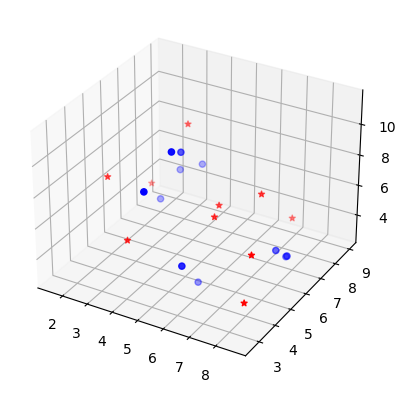

In [ ]:
# Tracer les données 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vert3[:, 0], vert3[:, 1], vert3[:, 2], c='r', marker='*')
ax.scatter(facets_3[:, 0], facets_3[:, 1], facets_3[:, 2], c='b', marker='o')

# Afficher le graphique
plt.show()

#dessiner le polyèdre resultant pour chaque région

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay

def plot_polyedre(facets_0):
  # Calculer la triangulation de Delaunay en 3D
  tri = Delaunay(facets_0)

  # Créer un objet Poly3DCollection pour représenter le volume
  poly3d = [facets_0[simplex] for simplex in tri.simplices]

  # Créer une figure pour le tracé 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Tracer le volume entre les points de facets_0_array
  ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.25, facecolors='c', linewidths=1, edgecolors='b'))

  # Tracer les points de facets_0_array
  ax.scatter(facets_0[:, 0], facets_0[:, 1], facets_0[:, 2], c='b', marker='o')
  # Tracer les points
  ax.scatter(vert3[:, 0], vert3[:, 1], vert3[:, 2], c='r', marker='*')

  # Choose the minimum and maximun value between facets_0 and vert3
  min_xlim = min(facets_0[:, 0]) if min(facets_0[:, 0]) <= min(vert3[:, 0]) else min(vert3[:, 0])
  max_xlim = max(facets_0[:, 0]) if max(facets_0[:, 0]) >= max(vert3[:, 0]) else max(vert3[:, 0])
  min_ylim = min(facets_0[:, 1]) if min(facets_0[:, 1]) <= min(vert3[:, 1]) else min(vert3[:, 1])
  max_ylim = max(facets_0[:, 1]) if max(facets_0[:, 1]) >= max(vert3[:, 1]) else max(vert3[:, 1])
  min_zlim = min(facets_0[:, 2]) if min(facets_0[:, 2]) <= min(vert3[:, 2]) else min(vert3[:, 2])
  max_zlim = max(facets_0[:, 2]) if max(facets_0[:, 2]) >= max(vert3[:, 2]) else max(vert3[:, 2])
  # Définir des limites pour les axes
  ax.set_xlim([min_xlim,max_xlim])
  ax.set_ylim([min_ylim,max_ylim])
  ax.set_zlim([min_zlim,max_zlim])

  # Définir des étiquettes pour les axes
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')

  # Afficher le tracé 3D
  plt.show()

#polyèdre_3 pour le point n°3

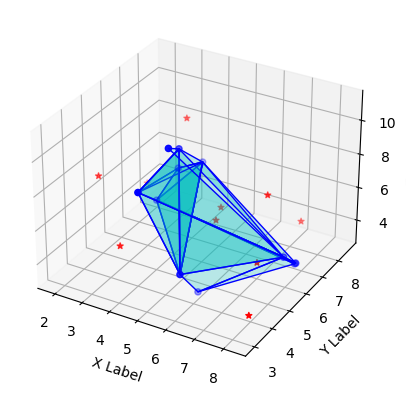

In [ ]:
plot_polyedre(facets_3)

#polyèdre_7 pour le point n°7

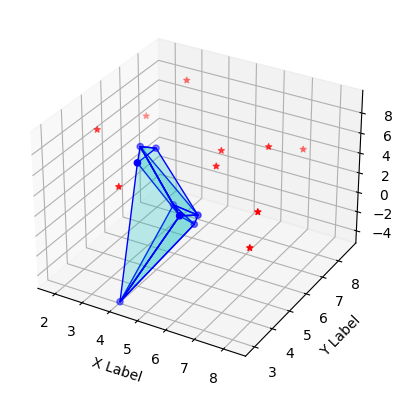

In [ ]:
plot_polyedre(get_polyhedron_facets(7))

#polyèdres 3 et 7 ensembles

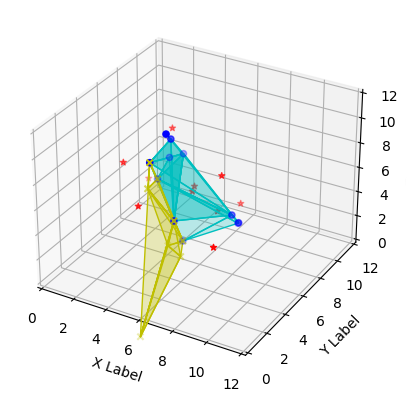

In [ ]:
#Calculer la triangulation de Delaunay en 3D
facets_7= get_polyhedron_facets(7)
tri_3 = Delaunay(facets_3)
tri_7 = Delaunay(facets_7)
# Créer un objet Poly3DCollection pour représenter le volume
poly3d_0 = [facets_3[simplex] for simplex in tri_3.simplices]
poly3d_1 = [facets_7[simplex] for simplex in tri_7.simplices]
# Créer une figure pour le tracé 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Tracer le volume entre les points de facets_0_array
ax.add_collection3d(Poly3DCollection(poly3d_0, alpha=0.25, facecolors='c', linewidths=1, edgecolors='c'))
ax.add_collection3d(Poly3DCollection(poly3d_1, alpha=0.25, facecolors='y', linewidths=1, edgecolors='y'))
# Tracer les points de facets_0 and facets_1
ax.scatter(facets_3[:, 0], facets_3[:, 1], facets_3[:, 2], c='b', marker='o')
ax.scatter(facets_7[:, 0], facets_7[:, 1], facets_7[:, 2], c='y', marker='x')
# Tracer les points
ax.scatter(vert3[:, 0], vert3[:, 1], vert3[:, 2], c='r', marker='*')

# Définir des limites pour les axes
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_zlim([0,12])

# Définir des étiquettes pour les axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Afficher le tracé 3D
plt.show()

In [ ]:
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

vert2 = np.array([
    [8.381184, 0.152739],
    [0.196395, 7.467857],
    [6.812772, 4.450964],
    [3.79481, 9.318146],
    [8.31796, 4.659943],
    [5.028129, 4.186495],
    [7.094714, 8.462214],
    [4.288924, 5.251525],
    [3.046174, 2.026474],
    [1.896537, 6.721375]
])
# Convert the list of tuples to a NumPy array
vert2 = np.array(vert2)

# Create Voronoi diagram
vor2 = Voronoi(vert2)

# Extracting information
vertices = vor2.vertices
ridge_vertices = vor2.ridge_vertices
regions = vor2.regions
print(vertices)

[[ 5.84079221  1.45153081]
 [ 1.79113928  8.79063858]
 [-0.46366762  3.65522752]
 [ 3.87822484  7.26495219]
 [ 5.0604686   7.40860049]
 [ 3.3042003   3.77901329]
 [ 2.0366121   4.2674692 ]
 [ 6.29000878  1.82494157]
 [ 7.86469125  2.39953942]
 [ 5.74897406  5.47585655]
 [ 6.07955127  6.51803403]
 [ 7.30484024  6.43191114]]


In [ ]:
print(ridge_vertices)

[[-1, 1], [-1, 2], [1, 2], [1, 3], [2, 6], [3, 6], [-1, 4], [3, 4], [0, 5], [-1, 0], [5, 6], [7, 9], [7, 8], [8, 11], [9, 10], [10, 11], [0, 7], [5, 9], [-1, 8], [-1, 11], [4, 10]]


In [ ]:
print(regions)

[[2, -1, 1], [6, 2, 1, 3], [4, -1, 1, 3], [6, 2, -1, 0, 5], [], [11, 8, 7, 9, 10], [9, 5, 0, 7], [8, -1, 0, 7], [11, -1, 8], [10, 4, 3, 6, 5, 9], [11, -1, 4, 10]]


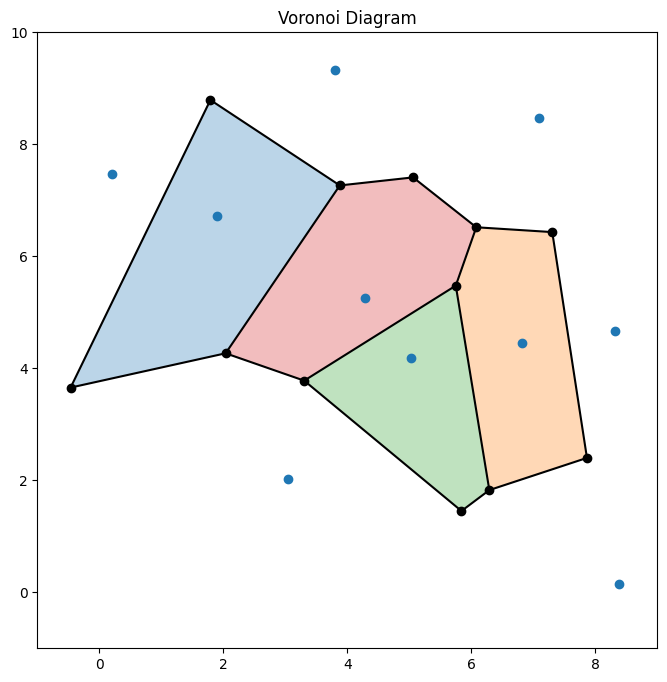

In [ ]:
# Plotting the Voronoi diagram
plt.figure(figsize=(8, 8))
plt.plot(vert2[:, 0], vert2[:, 1], 'o')  # Plot input points
plt.plot(vertices[:, 0], vertices[:, 1], 'ko')  # Plot Voronoi vertices

# Plot Voronoi ridge lines
for ridge in ridge_vertices:
    if -1 not in ridge:
      line = vertices[ridge]
      plt.plot(line[:, 0], line[:, 1], 'k-')

# Plot Voronoi cells
for region in regions:
    if -1 not in region and len(region) > 0:
        polygon = vertices[region]
        plt.fill(polygon[:, 0], polygon[:, 1], alpha=0.3)

# Set axes limits
plt.xlim([-1, 9])
plt.ylim([-1, 10])

plt.title('Voronoi Diagram')
plt.show()

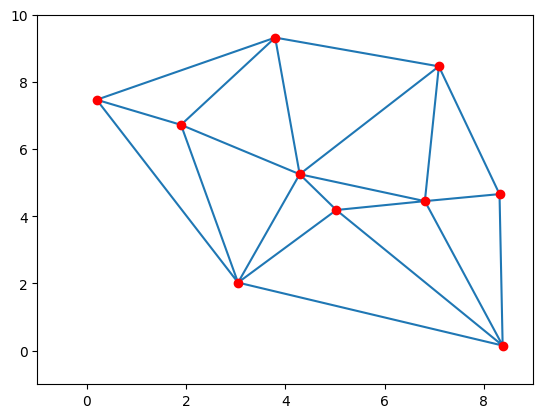

In [ ]:
# Calculer la triangulation de Delaunay
from scipy.spatial import Delaunay

tri2= Delaunay(vert2)

# Tracer les triangles de la triangulation de Delaunay
plt.figure()
plt.plot(vert2[:, 0], vert2[:, 1], 'r*')  # Points d'origine en rouge

# Tracer les triangles
plt.triplot(vert2[:, 0], vert2[:, 1], tri2.simplices)
plt.plot(vert2[:, 0], vert2[:, 1], 'ro')
# Set axes limits
plt.xlim([-1, 9])
plt.ylim([-1, 10])

# Afficher le graphique
plt.show()